In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def simple_init():
    M = 1
    K = 1
    D = 1
    pi = np.array([1])
    A = np.array([[1]])
    R = np.array([[1]])
    mu = np.array([[[0]]])
    sigma = np.array([[[[1]]]])
    return M, K, D, pi, A, R, mu, sigma

def big_init():
    M = 5 
    K = 3
    D = 2

    pi = np.array([1, 0, 0, 0, 0]) #initial state distribution

    A = np.array([
        [0.9, 0.025, 0.025, 0.025, 0.025],
        [0.025, 0.9, 0.025, 0.025, 0.025],
        [0.025, 0.025, 0.9, 0.025, 0.025],
        [0.025, 0.025, 0.025, 0.9, 0.025],
        [0.025, 0.025, 0.025, 0.025, 0.9],
    ]) #state transition matrix - likes to stay where it is

    R = np.ones((M, K)) / K # responsibility (gaussian mixture proportion)

    mu = np.array([
        [[0, 0], [1, 1], [2, 2]],
        [[5, 5], [6, 6], [7, 7]],
        [[10, 10], [11, 11], [12, 12]],
        [[15, 15], [16, 16], [17, 17]],
        [[20, 20], [21, 21], [22, 22]],
    ]) # M x K x D

    sigma = np.zeros((M, K, D, D))
    for m in range(M):
        for k in range(K):
            sigma[m,k] = np.eye(D)
    return M, K, D, pi, A, R, mu, sigma

def get_signals(N = 20, T = 100, init=big_init):
    M, K, D, pi, A, R, mu, sigma = init()
    X = []
    for n in range(N):
        x = np.zeros((T, D))
        s = 0 #initial state is 0 since pi[0] = 1
        r = np.random.choice(K, p=R[s]) #responsibility, choose a gaussian mixture
        x[0] = np.random.multivariate_normal(mu[s][r], sigma[s][r])
        for t in range(1, T):
            s = np.random.choice(M, p=A[s]) #choose a state
            r = np.random.choice(K, p=R[s]) # responsibility, choose a gaussian mixture
            x[t] = np.random.multivariate_normal(mu[s][r], sigma[s][r])
        X.append(x)
    return X

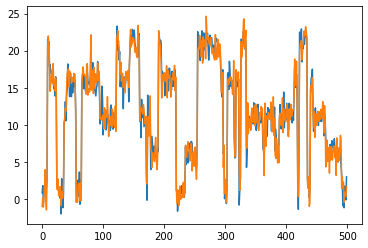

In [10]:
if __name__ == '__main__':
    T = 500
    x = get_signals(1, T)[0]
    axis = range(T)
    plt.plot(axis, x[:, 0], axis, x[:, 1])
    plt.show()
    

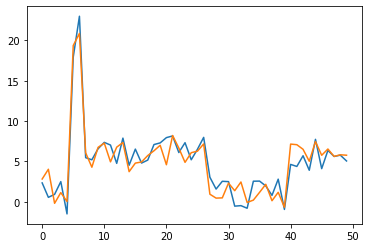

In [12]:
if __name__ == '__main__':
    T = 50
    x = get_signals(1, T)[0]
    axis = range(T)
    plt.plot(axis, x[:, 0], axis, x[:, 1])
    plt.show()